<a href="https://colab.research.google.com/github/snehasivakripa/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

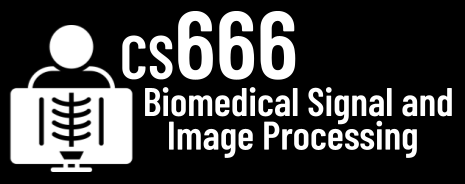
#Assignment 5

In [ ]:
# NAME: SNEHA BABUJI

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-13 22:13:25--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  21.2MB/s    in 0.3s    

2024-04-13 22:13:26 (21.2 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [ ]:
# Then use the following snippet to extract the data.

In [ ]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [ ]:
# TODO: 220

In [ ]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

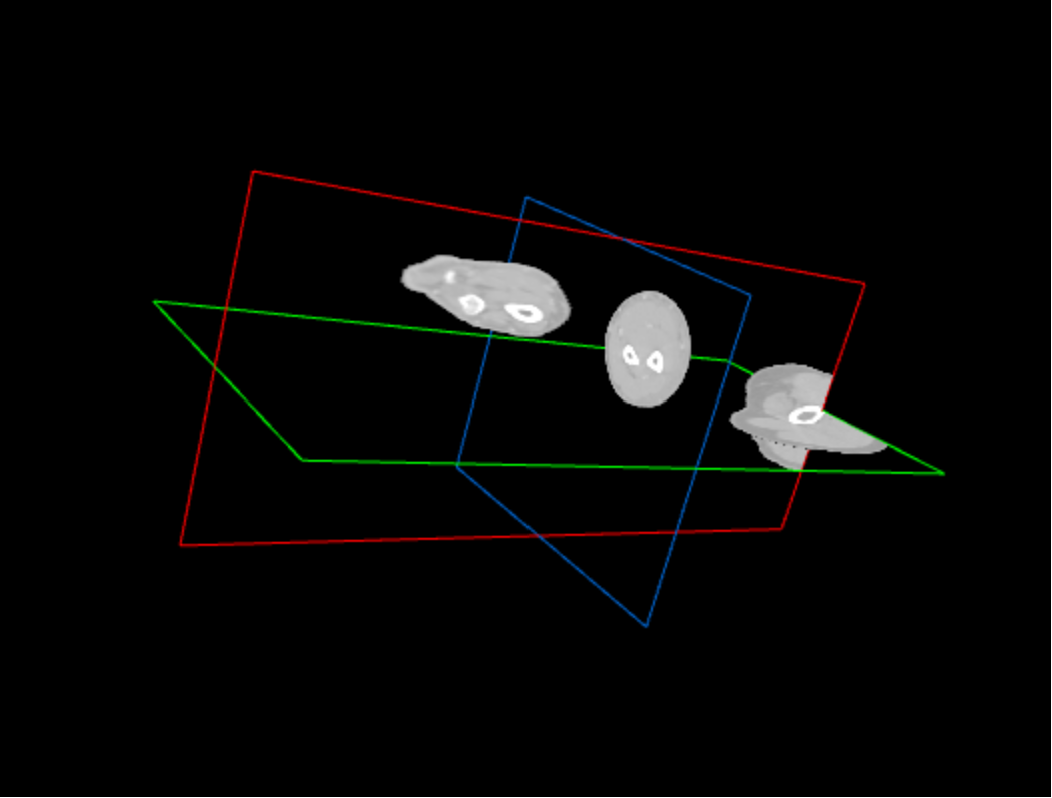

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

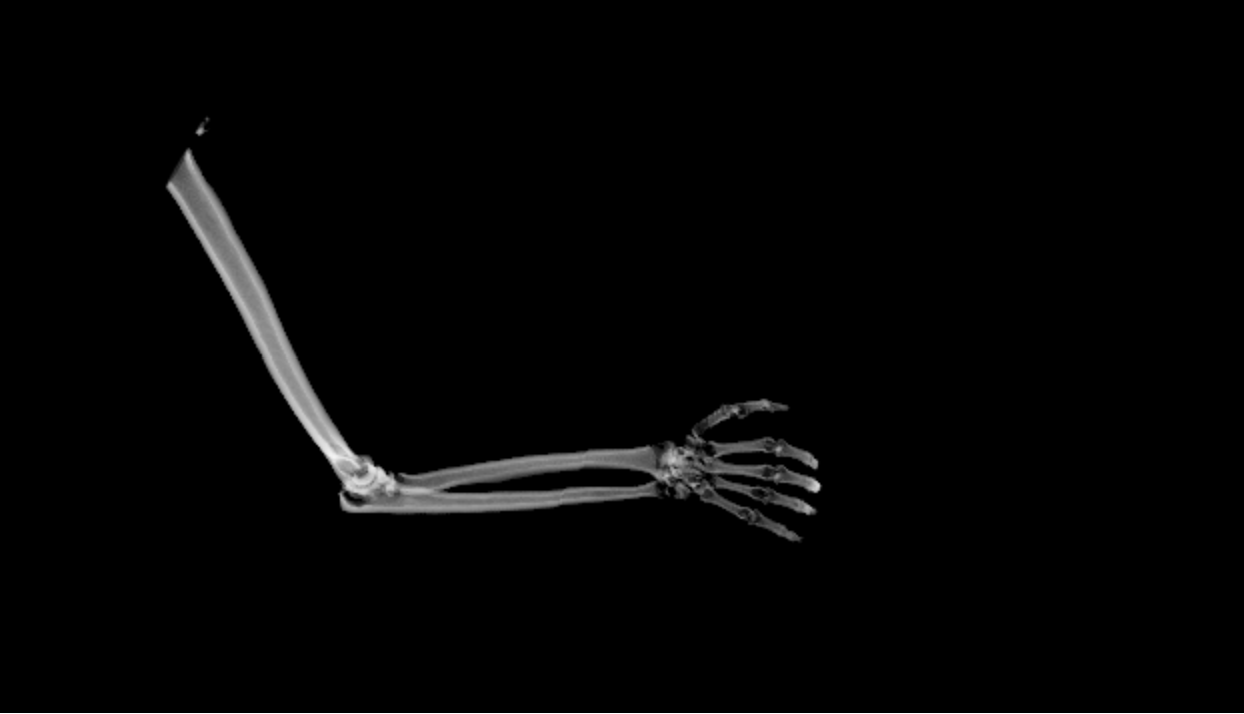

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [ ]:
from pydicom import dcmread

In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import re
import numpy as np
import pydicom

filenames= os.listdir('ct')
filenames.sort()

store_pixel_arrays = []

for filename in filenames:
  filepath = os.path.join('ct', filename)
  # Read the DICOM file
  dicom_data = pydicom.dcmread(filepath)
  # Access the pixel array
  pixel_array = dicom_data.pixel_array
  # Append the pixel array to the list
  store_pixel_arrays.append(pixel_array)
  # Stack pixel arrays along a new axis to create a 3D NumPy array
  volume = np.stack(store_pixel_arrays, axis=0)

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

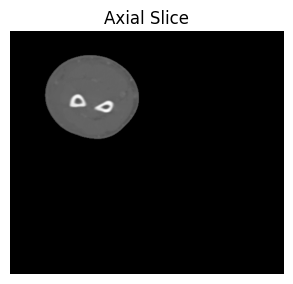

In [ ]:
# TODO: YOUR CODE FOR AXIAL
# Calculate indices for axial, sagittal, and coronal slices
axial_index = volume.shape[0] // 2
# Plot axial slice
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(volume[axial_index, :, :], cmap='gray')
plt.title('Axial Slice')
plt.axis('off')
plt.show()

(-0.5, 511.5, 219.5, -0.5)

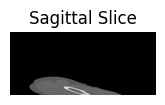

In [ ]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_index = volume.shape[1] // 2
# Plot sagittal slice
plt.subplot(1, 3, 2)
plt.imshow(volume[:, sagittal_index, :], cmap='gray')
plt.title('Sagittal Slice')
plt.axis('off')

(-0.5, 453.5, 219.5, -0.5)

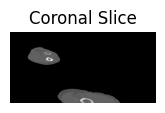

In [ ]:
# TODO: YOUR CODE FOR CORONAL
coronal_index = volume.shape[2] // 2
# Plot coronal slice
plt.subplot(1, 3, 3)
plt.imshow(volume[:, :, coronal_index], cmap='gray')
plt.title('Coronal Slice')
plt.axis('off')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window Center: 30
Window Width: 410
Rescale Intercept: -1024


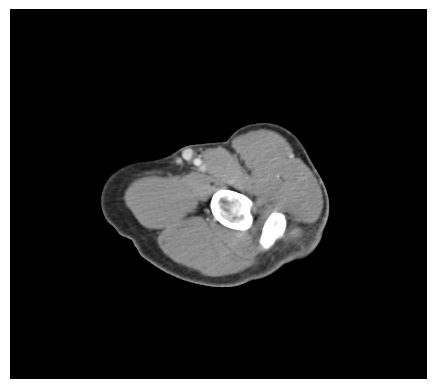

In [ ]:
def load_window_level(dicom_data):
    # Extract Window Center, Window Width, and Rescale Intercept
    window_center = dicom_data[(0x0028, 0x1050)].value
    window_width = dicom_data[(0x0028, 0x1051)].value
    rescale_intercept = dicom_data[(0x0028, 0x1052)].value

    return window_center, window_width, rescale_intercept

# Directory containing DICOM files
directory = 'ct'

filepath = os.path.join(directory, "IM-0001-0220.dcm")

# Read the DICOM file
dicom_data = pydicom.dcmread(filepath)

# Load window/level values
window_center, window_width, rescale_intercept= load_window_level(dicom_data)
if window_center is not None and window_width is not None and rescale_intercept is not None:
  print("Window Center:", window_center)
  print("Window Width:", window_width)
  print("Rescale Intercept:", rescale_intercept)
else:
  print("Window/Level values not found in DICOM file.")

# Apply window/level adjustment to the DICOM slice
slice_data = dicom_data.pixel_array

# Get DICOM metadata for conversion
slope = dicom_data.RescaleSlope
intercept = dicom_data.RescaleIntercept

# Convert pixel values to HU
hu_pixels = slice_data * slope + intercept

# Perform window/level adjustment
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

# Display the adjusted slice
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.axis('off')
plt.show()


In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

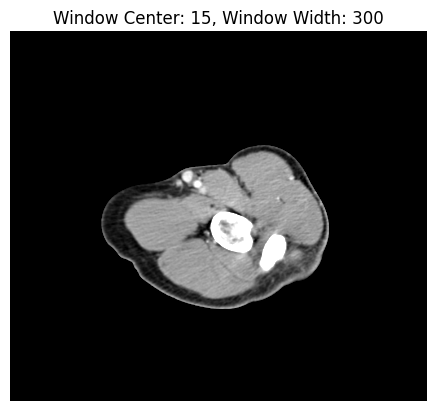

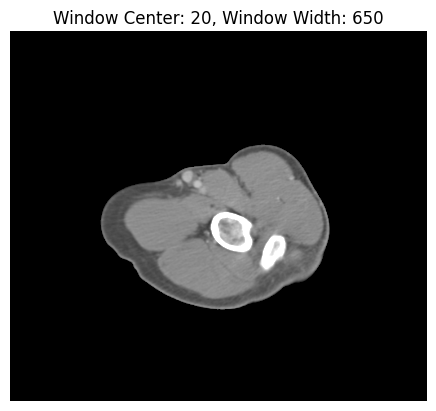

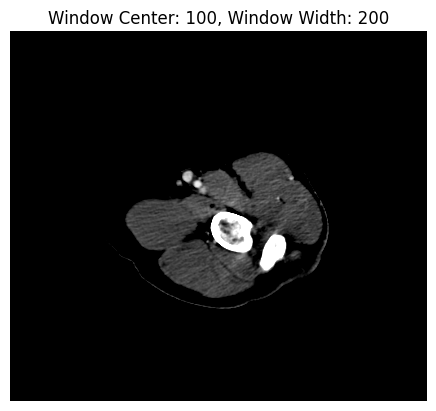

In [ ]:
# Different Window/Level values to test
window_levels = [
    {"window_center": 15, "window_width": 300},
    {"window_center": 20, "window_width": 650},
    {"window_center": 100, "window_width": 200}
]

for wl_values in window_levels:
        # Perform window/level adjustment
        vmin = wl_values["window_center"] - wl_values["window_width"] / 2
        vmax = wl_values["window_center"] + wl_values["window_width"] / 2

        # Display the adjusted slice
        plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
        plt.title(f"Window Center: {wl_values['window_center']}, Window Width: {wl_values['window_width']}")
        plt.axis('off')
        plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# "window_center": 15, "window_width": 300 makes sense for me as they are clearly segmented than the rest.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

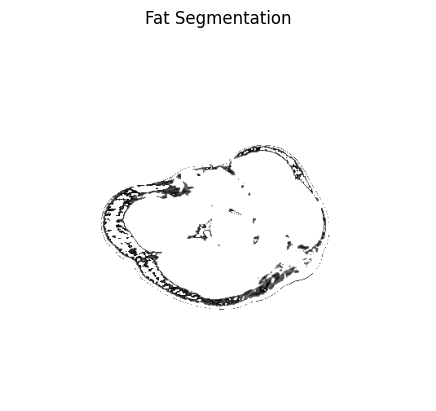

In [43]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Directory containing DICOM files
directory = 'ct'

# Get list of filenames in the directory
filenames = os.listdir(directory)
filenames.sort()  # Sort filenames

# HU thresholds for fat, soft tissue, and bones
fat_threshold = (-100, -50)
soft_tissue_threshold = (20, 60)
bone_threshold = (400, 3000)

# Number of slices to visualize per structure
num_slices = 3


filepath = os.path.join(directory, "IM-0001-0220.dcm")

# Read the DICOM file
dicom_data = pydicom.dcmread(filepath)

# Load DICOM pixel data and HU rescaling parameters
slice_data = dicom_data.pixel_array
slope = dicom_data.RescaleSlope
intercept = dicom_data.RescaleIntercept

# Convert pixel values to Hounsfield Units (HU)
hu_pixels = slice_data * slope + intercept

# Create segmentation masks for fat, soft tissue, and bones
fat_mask = hu_pixels.copy()
fat_mask[(fat_mask < fat_threshold[0]) | (fat_mask > fat_threshold[1])] = 0
fat_mask = fat_mask.astype(np.int16)

# Fat segmentation mask visualization
plt.imshow(fat_mask, cmap='gray')
plt.title("Fat Segmentation")
plt.axis('off')
plt.show()


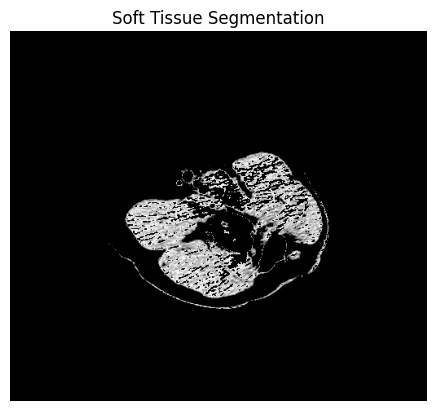

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_tissue_mask = hu_pixels.copy()
soft_tissue_mask[(soft_tissue_mask < soft_tissue_threshold[0]) | (soft_tissue_mask > soft_tissue_threshold[1])] = 0
soft_tissue_mask = soft_tissue_mask.astype(np.int16)

  # Soft tissue segmentation mask visualization
plt.imshow(soft_tissue_mask, cmap='gray')
plt.title("Soft Tissue Segmentation")
plt.axis('off')
plt.show()

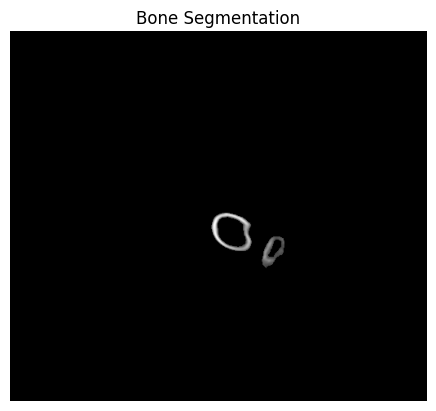

In [44]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_mask = hu_pixels.copy()
bone_mask[(bone_mask < bone_threshold[0]) | (bone_mask > bone_threshold[1])] = 0
bone_mask = bone_mask.astype(np.int16)

# Bone segmentation mask visualization
plt.imshow(bone_mask, cmap='gray')
plt.title("Bone Segmentation")
plt.axis('off')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# Yes the segmentation are good

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""